<a href="https://colab.research.google.com/github/Abishethvarman/CrossDomain-Interpretable-Regression/blob/main/07-Paddy/Nb_07_paddy_model_lvl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#csv upload
from google.colab import files
uploaded = files.upload()

Saving 2021_2022 Maha.csv to 2021_2022 Maha.csv


In [2]:
!pip install tensorflow

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn  # Import sklearn after installing the specific version
sklearn.set_config(display='text')
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

import tensorflow as tf


In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

# !ln -s /content/gdrive/My\ Drive/ /mydrive
# !ls /mydrive

In [ ]:
# %cd /content/gdrive/MyDrive/Dataset

In [4]:
df = pd.read_csv('2021_2022 Maha.csv')

In [5]:
df

,District,Major_Schemes_Sown,Minor_Schemes_Sown,Rainfed_Sown,All_Schemes_Sown,Major_Schemes_Harvested,Minor_Schemes_Harvested,Rainfed_Harvested,All_Schemes_Harvested,Major_Schemes_Yield,Minor_Schemes_Yield,Rainfed_Yield,Average_Yield,Nett_Extent_Harvested,Total_Production
0,COLOMBO,324,710,2796,3830,324,710,2777,3811,3321,2236,2500,2521,3239,8166
1,GAMPAHA,1659,3076,6776,11511,1556,3036,6610,11202,2056,2671,3105,2842,9522,27059
2,KALUTARA,145,1573,10221,11939,129,1544,9893,11566,3716,2341,2583,2563,10669,27349
3,KANDY,4268,5181,2762,12211,4268,5176,2757,12201,3092,3190,3540,3235,9649,31211
4,MATALE,7628,7839,4525,19992,7593,7815,4512,19920,3089,3601,3304,3339,17914,59812
5,NUWARAELIYA,900,4133,11,5044,900,4126,8,5034,4652,3763,3870,3922,2836,11126
6,GALLE,144,1756,9335,11235,144,1706,9071,10921,2653,2825,2453,2514,8546,21486
7,MATARA,4259,3193,6233,13685,4105,2963,6110,13178,3149,2625,2573,2764,10404,28761
8,HAMBANTOTA,29498,5463,1143,36104,29438,5438,1131,36007,4144,3180,3202,3969,31459,124870
9,JAFFNA,-,-,11127,11127,-,-,7775,7775,-,-,2176,2176,6899,15013


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   District                 26 non-null     object
 1   Major_Schemes_Sown       26 non-null     object
 2   Minor_Schemes_Sown       26 non-null     object
 3   Rainfed_Sown             26 non-null     int64 
 4   All_Schemes_Sown         26 non-null     int64 
 5   Major_Schemes_Harvested  26 non-null     object
 6   Minor_Schemes_Harvested  26 non-null     object
 7   Rainfed_Harvested        26 non-null     int64 
 8   All_Schemes_Harvested    26 non-null     int64 
 9   Major_Schemes_Yield      26 non-null     object
 10  Minor_Schemes_Yield      26 non-null     object
 11  Rainfed_Yield            26 non-null     int64 
 12  Average_Yield            26 non-null     int64 
 13  Nett_Extent_Harvested    26 non-null     int64 
 14  Total_Production         26 non-null     int

In [7]:
df.describe()

,Rainfed_Sown,All_Schemes_Sown,Rainfed_Harvested,All_Schemes_Harvested,Rainfed_Yield,Average_Yield,Nett_Extent_Harvested,Total_Production
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,2.600000e+01
mean,16662.692308,59680.461538,16195.076923,58934.461538,2589.153846,2853.038462,52704.923077,1.485562e+05
std,41683.252438,148837.309992,40547.692147,147041.177843,633.483303,524.696749,131493.600610,3.711223e+05
min,11.000000,3830.000000,8.000000,3811.000000,1304.000000,1639.000000,2836.000000,8.166000e+03
25%,2770.500000,12007.000000,2762.000000,11724.750000,2173.000000,2515.750000,9837.750000,2.770200e+04
50%,6504.500000,20229.000000,6360.000000,19874.000000,2549.000000,2847.500000,18310.500000,4.719300e+04
75%,13029.750000,38763.500000,12982.750000,38723.500000,3029.500000,3197.500000,35987.250000,9.954775e+04
max,216615.000000,775846.000000,210536.000000,766148.000000,3870.000000,3969.000000,685164.000000,1.931230e+06


In [8]:
missing_vals=df.isnull().sum()
missing_vals

,0
District,0
Major_Schemes_Sown,0
Minor_Schemes_Sown,0
Rainfed_Sown,0
All_Schemes_Sown,0
Major_Schemes_Harvested,0
Minor_Schemes_Harvested,0
Rainfed_Harvested,0
All_Schemes_Harvested,0
Major_Schemes_Yield,0


In [9]:
df.columns

Index(['District', 'Major_Schemes_Sown', 'Minor_Schemes_Sown', 'Rainfed_Sown',
       'All_Schemes_Sown', 'Major_Schemes_Harvested',
       'Minor_Schemes_Harvested', 'Rainfed_Harvested', 'All_Schemes_Harvested',
       'Major_Schemes_Yield', 'Minor_Schemes_Yield', 'Rainfed_Yield',
       'Average_Yield', 'Nett_Extent_Harvested', 'Total_Production'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder


df_clean = df.copy()


# ==============================
# 3. Encode District (Nominal Feature)
# ==============================
le = LabelEncoder()
df_clean['District_Encoded'] = le.fit_transform(df_clean['District'])


# ==============================
# 4. Convert Object Columns to Numeric
# ==============================
object_numeric_cols = [
    'Major_Schemes_Sown',
    'Minor_Schemes_Sown',
    'Major_Schemes_Harvested',
    'Minor_Schemes_Harvested',
    'Major_Schemes_Yield',
    'Minor_Schemes_Yield'
]

for col in object_numeric_cols:
    df_clean[col] = (
        df_clean[col]
        .astype(str)
        .str.replace(',', '', regex=True)
        .replace(['-', 'NA', 'nan', 'None', ''], np.nan)
    )
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')


# ==============================
# 5. Drop Original District Column
# ==============================
df_clean = df_clean.drop(columns=['District'])


# ==============================
# 6. Handle Missing Values (Model-Safe)
# ==============================
df_clean = df_clean.fillna(df_clean.median())


# ==============================
# 7. Final Check
# ==============================
print(df_clean.info())
print(df_clean.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Major_Schemes_Sown       26 non-null     float64
 1   Minor_Schemes_Sown       26 non-null     float64
 2   Rainfed_Sown             26 non-null     int64  
 3   All_Schemes_Sown         26 non-null     int64  
 4   Major_Schemes_Harvested  26 non-null     float64
 5   Minor_Schemes_Harvested  26 non-null     float64
 6   Rainfed_Harvested        26 non-null     int64  
 7   All_Schemes_Harvested    26 non-null     int64  
 8   Major_Schemes_Yield      26 non-null     float64
 9   Minor_Schemes_Yield      26 non-null     float64
 10  Rainfed_Yield            26 non-null     int64  
 11  Average_Yield            26 non-null     int64  
 12  Nett_Extent_Harvested    26 non-null     int64  
 13  Total_Production         26 non-null     int64  
 14  District_Encoded         26 

In [14]:
df_clean

,Major_Schemes_Sown,Minor_Schemes_Sown,Rainfed_Sown,All_Schemes_Sown,Major_Schemes_Harvested,Minor_Schemes_Harvested,Rainfed_Harvested,All_Schemes_Harvested,Major_Schemes_Yield,Minor_Schemes_Yield,Rainfed_Yield,Average_Yield,Nett_Extent_Harvested,Total_Production,District_Encoded
0,324.0,710.0,2796,3830,324.0,710.0,2777,3811,3321.0,2236.0,2500,2521,3239,8166,4
1,1659.0,3076.0,6776,11511,1556.0,3036.0,6610,11202,2056.0,2671.0,3105,2842,9522,27059,6
2,145.0,1573.0,10221,11939,129.0,1544.0,9893,11566,3716.0,2341.0,2583,2563,10669,27349,9
3,4268.0,5181.0,2762,12211,4268.0,5176.0,2757,12201,3092.0,3190.0,3540,3235,9649,31211,10
4,7628.0,7839.0,4525,19992,7593.0,7815.0,4512,19920,3089.0,3601.0,3304,3339,17914,59812,15
5,900.0,4133.0,11,5044,900.0,4126.0,8,5034,4652.0,3763.0,3870,3922,2836,11126,19
6,144.0,1756.0,9335,11235,144.0,1706.0,9071,10921,2653.0,2825.0,2453,2514,8546,21486,5
7,4259.0,3193.0,6233,13685,4105.0,2963.0,6110,13178,3149.0,2625.0,2573,2764,10404,28761,16
8,29498.0,5463.0,1143,36104,29438.0,5438.0,1131,36007,4144.0,3180.0,3202,3969,31459,124870,7
9,8512.0,5181.0,11127,11127,8353.0,5176.0,7775,7775,3109.0,2701.0,2176,2176,6899,15013,8


###XGBoost

XGBoost Regressor – Test Results
RMSE: 33725.2807
MAE : 26638.7090
R²  : 0.4214


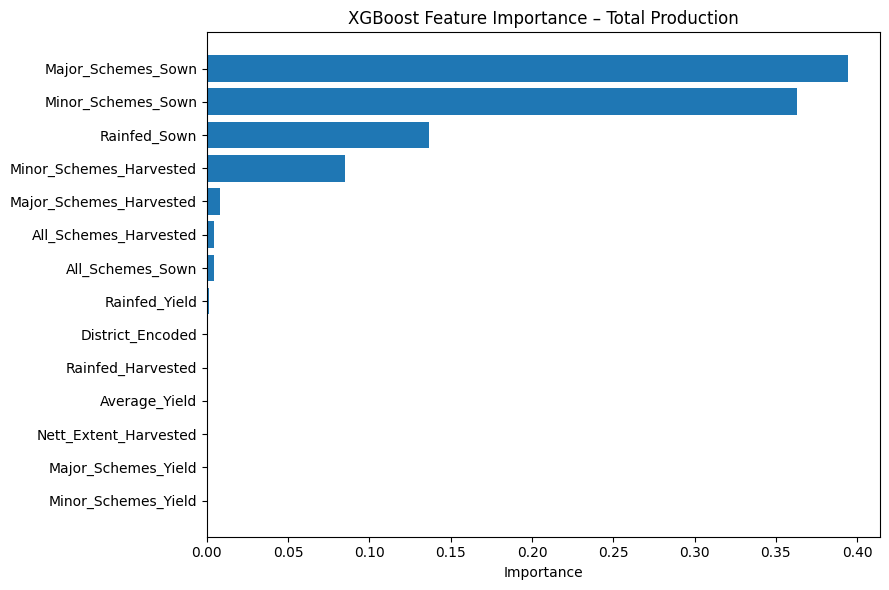

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from xgboost import XGBRegressor


# ==============================
# Split features and target
# ==============================
X = df_clean.drop('Total_Production', axis=1)
y = df_clean['Total_Production']


# ==============================
# Train-test split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


# ==============================
# XGBoost Regressor
# ==============================
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

model.fit(X_train, y_train)


# ==============================
# Predictions
# ==============================
test_pred = model.predict(X_test)


# ==============================
# Evaluation
# ==============================
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
mae = mean_absolute_error(y_test, test_pred)
r2 = r2_score(y_test, test_pred)

print("XGBoost Regressor – Test Results")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


# ==============================
# Feature Importance Plot
# ==============================
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance')

plt.figure(figsize=(9, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel("Importance")
plt.title("XGBoost Feature Importance – Total Production")
plt.tight_layout()
plt.show()


### Randomforest

Random Forest Regressor – Test Results
RMSE: 60388.6631
MAE : 43250.0683
R²  : -0.8551


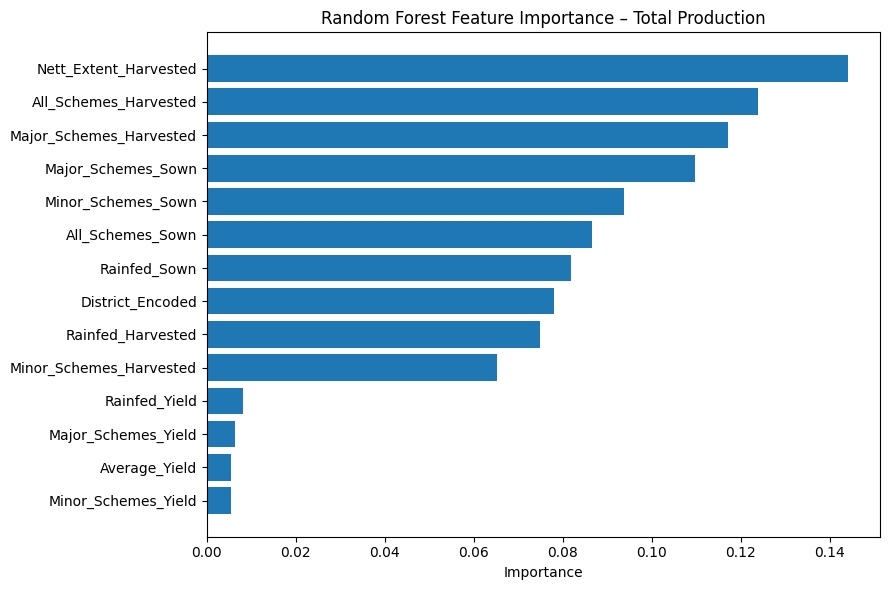

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# ==============================
# Split features and target
# ==============================
X = df_clean.drop('Total_Production', axis=1)
y = df_clean['Total_Production']


# ==============================
# Train-test split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


# ==============================
# Random Forest Regressor
# ==============================
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)

rf_model.fit(X_train, y_train)


# ==============================
# Predictions
# ==============================
y_pred = rf_model.predict(X_test)


# ==============================
# Evaluation
# ==============================
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor – Test Results")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


# ==============================
# Feature Importance Plot
# ==============================
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance')

plt.figure(figsize=(9, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance – Total Production")
plt.tight_layout()
plt.show()


### CNN

In [17]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split

import numpy as np

# ------------------------------
# Prepare Dataset
# ------------------------------
class PaddyDataset(Dataset):
    def __init__(self, df):
        self.X = df.drop('Total_Production', axis=1).values.astype(np.float32)
        self.y = df['Total_Production'].values.astype(np.float32).reshape(-1, 1)

        # Add channel dimension for CNN: (samples, channels, features)
        self.X = np.expand_dims(self.X, axis=1)  # channels=1

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx]), torch.tensor(self.y[idx])


dataset = PaddyDataset(df_clean)

# Train-test split: 80/20
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_ds, test_ds = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_ds, batch_size=8, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=8, shuffle=False)


# ------------------------------
# Define CNN Model
# ------------------------------
class TabularCNN(nn.Module):
    def __init__(self, num_features):
        super(TabularCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=2)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv1d(16, 32, kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear((num_features - 2) * 32, 64)  # adjust based on conv output
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


num_features = df_clean.drop('Total_Production', axis=1).shape[1]
model = TabularCNN(num_features)

# ------------------------------
# Loss & Optimizer
# ------------------------------
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


# ------------------------------
# Train Loop
# ------------------------------
epochs = 200
for epoch in range(epochs):
    model.train()
    running_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X_batch.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    if (epoch+1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}")


# ------------------------------
# Evaluation
# ------------------------------
model.eval()
y_preds, y_true = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        y_preds.append(outputs.numpy())
        y_true.append(y_batch.numpy())

y_preds = np.vstack(y_preds)
y_true = np.vstack(y_true)

rmse = np.sqrt(np.mean((y_true - y_preds)**2))
mae = np.mean(np.abs(y_true - y_preds))
r2 = 1 - np.sum((y_true - y_preds)**2) / np.sum((y_true - np.mean(y_true))**2)

print("\nCNN Regression Test Results")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


Epoch [20/200], Loss: 3142729737.6000
Epoch [40/200], Loss: 434884886.4000
Epoch [60/200], Loss: 380157347.2000
Epoch [80/200], Loss: 330390478.4000
Epoch [100/200], Loss: 279934570.4000
Epoch [120/200], Loss: 251191062.4000
Epoch [140/200], Loss: 206121126.4000
Epoch [160/200], Loss: 168735753.1000
Epoch [180/200], Loss: 142756448.0000
Epoch [200/200], Loss: 121232243.2000

CNN Regression Test Results
RMSE: 30708.4180
MAE : 20197.6621
R²  : 0.8752


### SVM

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -----------------------------
# Split features and target
# -----------------------------
X = df_clean.drop('Total_Production', axis=1)
y = df_clean['Total_Production']

# -----------------------------
# Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# -----------------------------
# Feature Scaling
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# SVR Model
# -----------------------------
svr_model = SVR(
    kernel='rbf',    # radial basis function (non-linear)
    C=100,           # regularization
    epsilon=0.1,     # insensitive loss
    gamma='scale'    # automatic gamma
)

# Train
svr_model.fit(X_train_scaled, y_train)

# Predict
y_pred = svr_model.predict(X_test_scaled)

# -----------------------------
# Evaluation
# -----------------------------
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("SVR Regression – Test Results")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


SVR Regression – Test Results
RMSE: 44500.6923
MAE : 41294.5853
R²  : -0.0074


### Decision Tree

Decision Tree Regressor – Test Results
RMSE: 11260.8559
MAE : 8227.0000
R²  : 0.9355


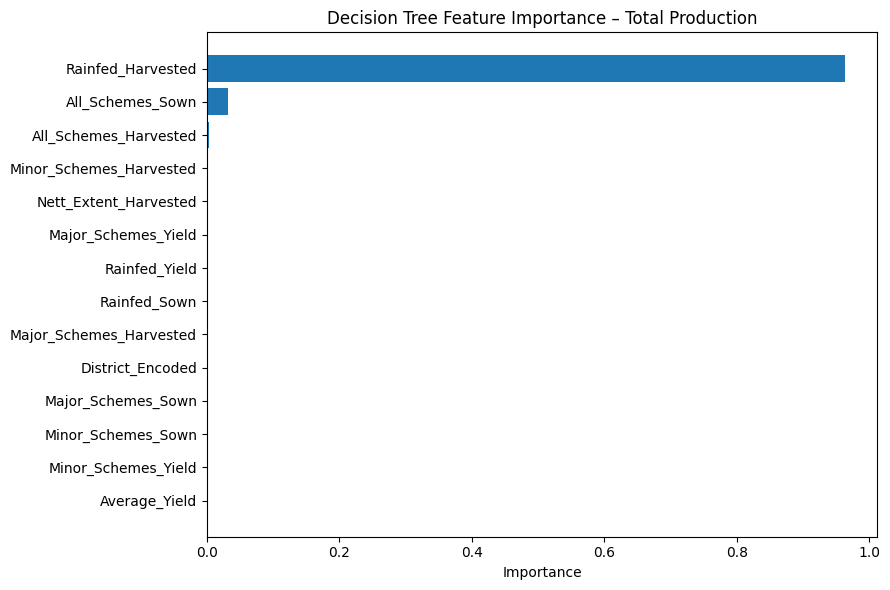

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -----------------------------
# Split features and target
# -----------------------------
X = df_clean.drop('Total_Production', axis=1)
y = df_clean['Total_Production']

# -----------------------------
# Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# -----------------------------
# Decision Tree Regressor
# -----------------------------
dt_model = DecisionTreeRegressor(
    max_depth=None,        # can tune for overfitting
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Train
dt_model.fit(X_train, y_train)

# -----------------------------
# Predictions
# -----------------------------
y_pred = dt_model.predict(X_test)

# -----------------------------
# Evaluation
# -----------------------------
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regressor – Test Results")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

# -----------------------------
# Feature Importance Plot
# -----------------------------
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance')

plt.figure(figsize=(9, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel("Importance")
plt.title("Decision Tree Feature Importance – Total Production")
plt.tight_layout()
plt.show()


## EBM

In [ ]:
pip install interpret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 59.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 115.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.1/780.1 kB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.7/264.7 kB 18.6 MB/s eta 0:00:00
  Created wheel for dash-cytoscape: filename=dash_cytoscape-1.0.2-py3-none-any.whl size=4

In [ ]:
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show

EBM Regressor Model: Test Data
RMSE: 4.2158
MAE: 2.9842
R² Score: 0.9310



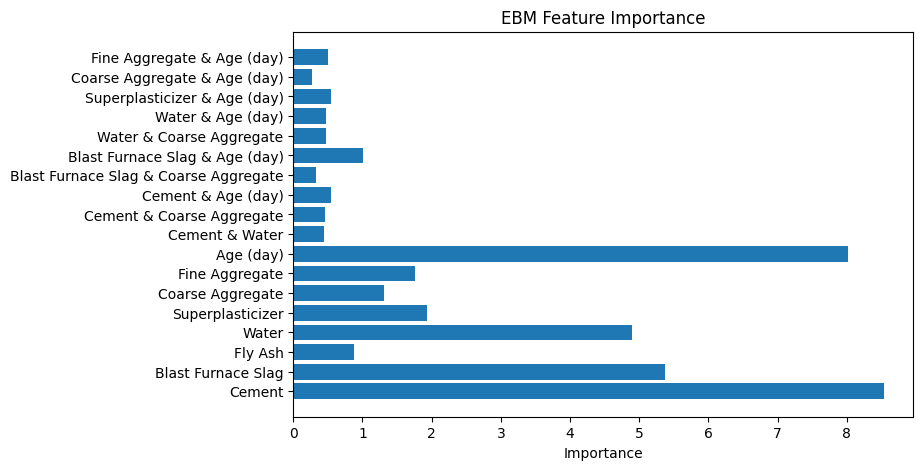

In [ ]:
X = df.drop('Concrete compressive strength ', axis=1)
y = df['Concrete compressive strength ']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------
# EBM Model
# ------------------------------
ebm = ExplainableBoostingRegressor(
    random_state=42,
    max_bins=256,
    interactions=10        # Increase if you want more interaction terms
)

# Train
ebm.fit(X_train, y_train)

# Predict
test_pred = ebm.predict(X_test)

# ------------------------------
# Evaluation
# ------------------------------
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
mae = mean_absolute_error(y_test, test_pred)
r2 = r2_score(y_test, test_pred)

print("EBM Regressor Model: Test Data")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}\n")

# ------------------------------
# Feature Importance (Global)
# ------------------------------
global_exp = ebm.explain_global()
show(global_exp)

# Optional: Plot only numeric importance
importances = global_exp.data()['scores']
features = global_exp.data()['names']

plt.figure(figsize=(8, 5))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("EBM Feature Importance")
plt.show()

## GAM - Generalized additive model

In [ ]:
!pip install pygam

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.6 MB/s eta 0:00:00


GAM (Generalized Additive Model) Regressor: Test Data
RMSE: 5.6258
MAE: 4.5105
R² Score: 0.8772



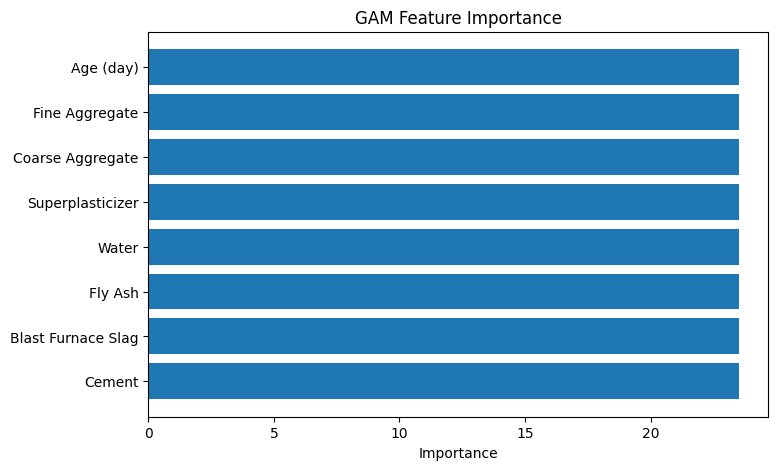

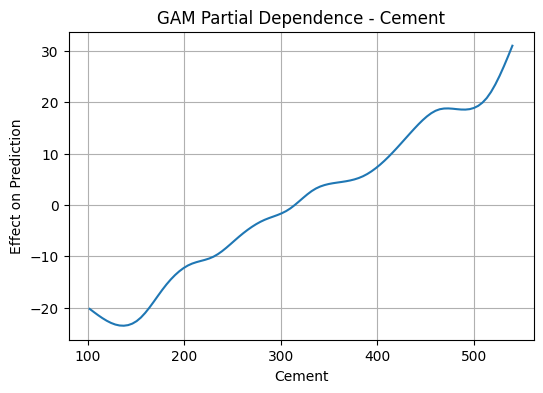

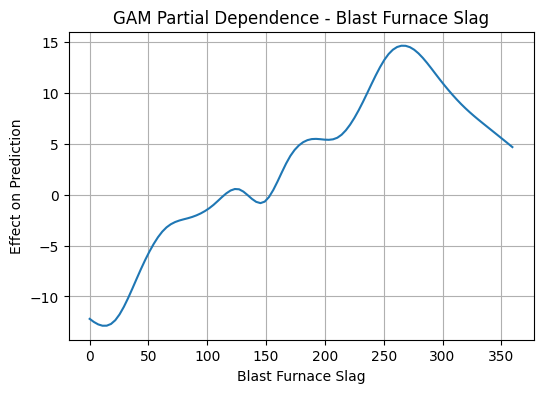

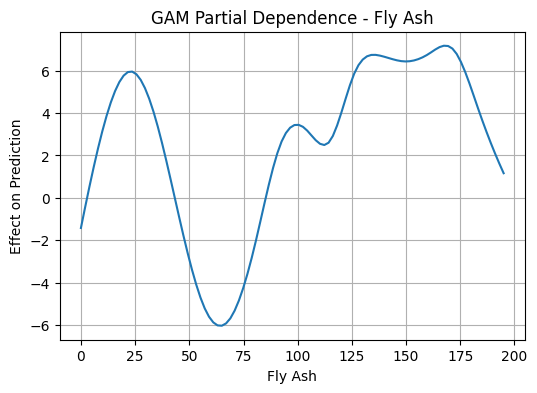

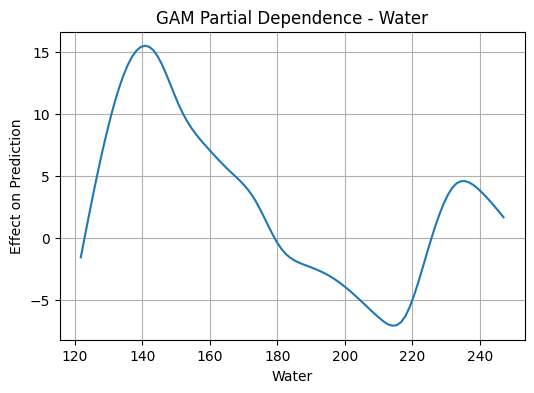

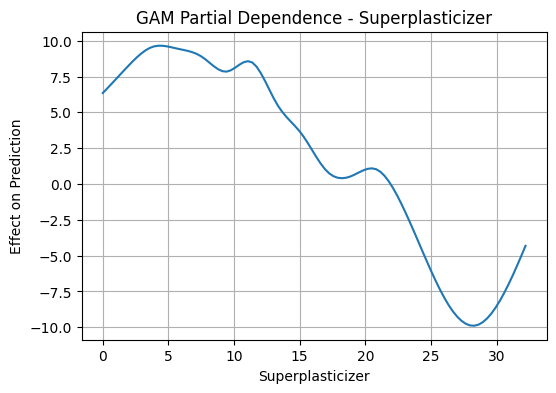

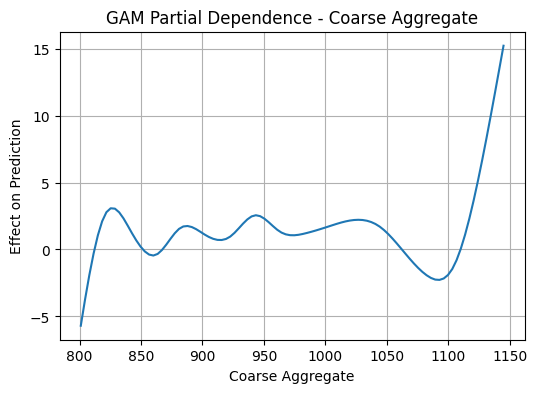

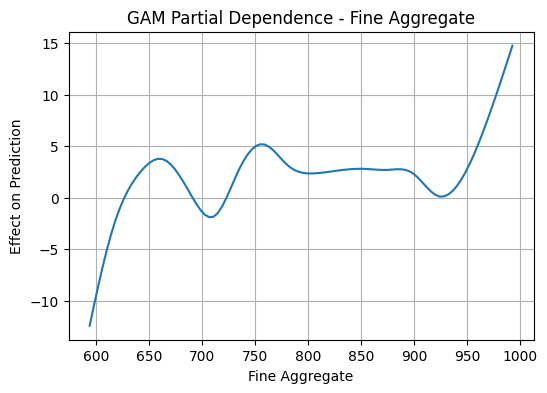

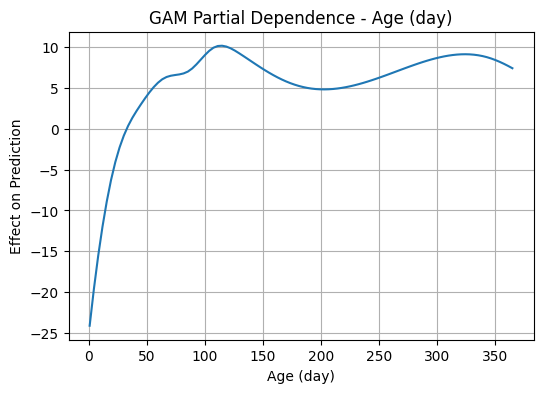

In [ ]:
from pygam import LinearGAM, s
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --------------------------------------
# Prepare Data
# --------------------------------------
X = df.drop('Concrete compressive strength ', axis=1)
y = df['Concrete compressive strength ']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------------------------------------
# Train GAM Model
# --------------------------------------

# Create a GAM with smooth terms for each feature
gam = LinearGAM(n_splines=20).fit(X_train, y_train)

# --------------------------------------
# Predict
# --------------------------------------
test_pred = gam.predict(X_test)

# --------------------------------------
# Evaluation Metrics
# --------------------------------------
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
mae = mean_absolute_error(y_test, test_pred)
r2 = r2_score(y_test, test_pred)

print("GAM (Generalized Additive Model) Regressor: Test Data")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}\n")

# --------------------------------------
# Feature Importance (Based on Deviance Reduction)
# --------------------------------------
importance = gam.deviance_residuals(X_train, y_train).var(axis=0)

plt.figure(figsize=(8,5))
plt.barh(X.columns, importance)
plt.xlabel("Importance")
plt.title("GAM Feature Importance")
plt.show()

# --------------------------------------
# Partial Dependence Plots for each feature
# --------------------------------------
for i, col in enumerate(X.columns):
    plt.figure(figsize=(6,4))
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    plt.title(f"GAM Partial Dependence - {col}")
    plt.xlabel(col)
    plt.ylabel("Effect on Prediction")
    plt.grid(True)
    plt.show()


# Uncertainty Quantification

## Quantile Regression Forests

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 8
[LightGBM] [Info] Start training from score 14.427286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

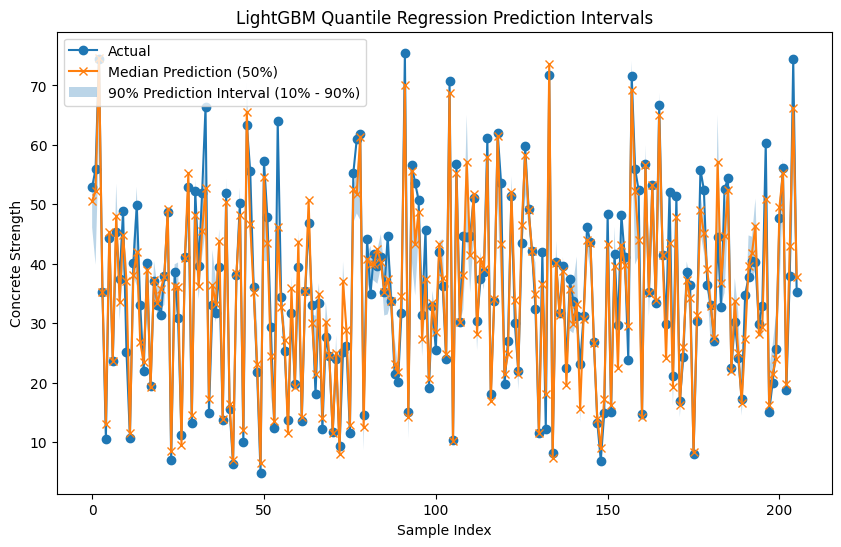

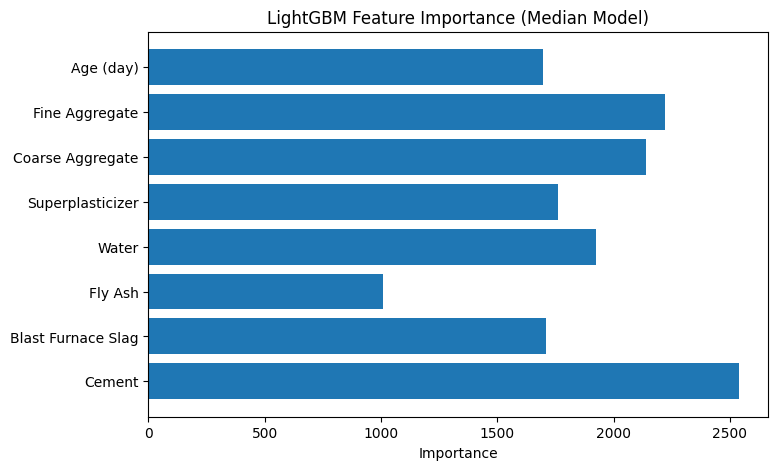

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import lightgbm as lgb

# --------------------------------------
# Prepare Data
# --------------------------------------
X = df.drop('Concrete compressive strength ', axis=1)
y = df['Concrete compressive strength ']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------------------------------------
# Train Quantile Models (10%, 50%, 90%)
# --------------------------------------
def train_quantile_model(alpha):
    params = {
        'objective': 'quantile',
        'alpha': alpha,
        'learning_rate': 0.05,
        'n_estimators': 500,
        'max_depth': -1,
        'min_child_samples': 10,
        'subsample': 0.9,
        'colsample_bytree': 0.9,
        'random_state': 42
    }
    model = lgb.LGBMRegressor(**params)
    model.fit(X_train, y_train)
    return model

model_lower = train_quantile_model(0.1)
model_median = train_quantile_model(0.5)
model_upper = train_quantile_model(0.9)

# --------------------------------------
# Predictions
# --------------------------------------
lower = model_lower.predict(X_test)
median = model_median.predict(X_test)
upper = model_upper.predict(X_test)

# --------------------------------------
# Evaluation (using median)
# --------------------------------------
rmse = np.sqrt(mean_squared_error(y_test, median))
mae = mean_absolute_error(y_test, median)
r2 = r2_score(y_test, median)

print("LightGBM Quantile Regression Model: Test Data")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}\n")

# --------------------------------------
# Prediction Interval Plot
# --------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test.values, label="Actual", marker='o')
plt.plot(range(len(y_test)), median, label="Median Prediction (50%)", marker='x')
plt.fill_between(
    range(len(y_test)),
    lower,
    upper,
    alpha=0.3,
    label="90% Prediction Interval (10% - 90%)"
)
plt.title("LightGBM Quantile Regression Prediction Intervals")
plt.xlabel("Sample Index")
plt.ylabel("Concrete Strength")
plt.legend()
plt.show()

# --------------------------------------
# Feature Importance
# --------------------------------------
plt.figure(figsize=(8,5))
plt.barh(X.columns, model_median.feature_importances_)
plt.xlabel("Importance")
plt.title("LightGBM Feature Importance (Median Model)")
plt.show()


## Bayesian GAM code

In [ ]:
pip install pygam


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.0 MB/s eta 0:00:00


100% (11 of 11) |########################| Elapsed Time: 0:00:10 Time:  0:00:10


Bayesian GAM Model (Test Set)
RMSE: 5.5594
MAE: 4.2649
R² Score: 0.8801



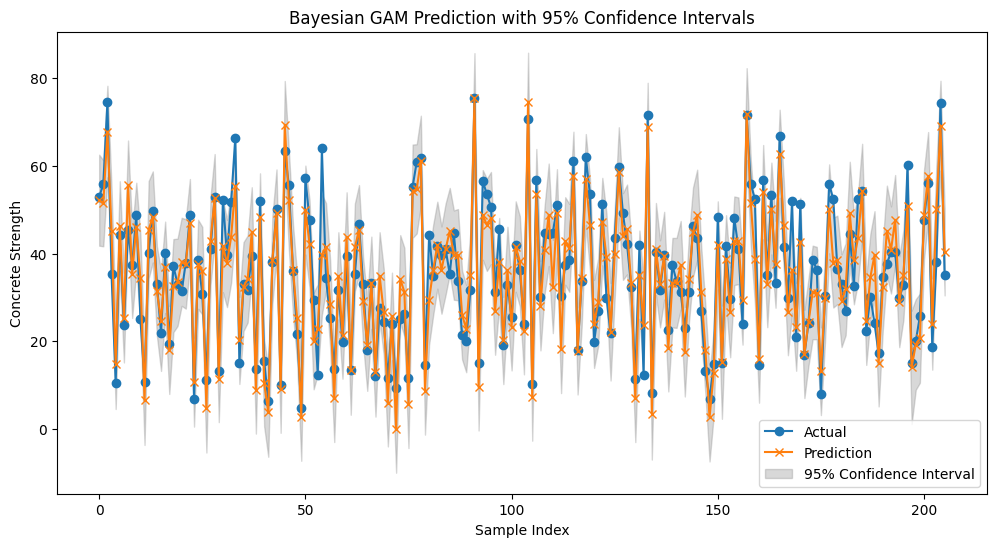

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pygam import LinearGAM, s
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)

# --------------------------------------
# Prepare data
# --------------------------------------
X = df.drop('Concrete compressive strength ', axis=1).values
y = df['Concrete compressive strength '].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------------------------------------
# Build Terms (spline per feature)
# --------------------------------------
n_features = X_train.shape[1]

terms = s(0)
for i in range(1, n_features):
    terms += s(i)

# --------------------------------------
# Train Bayesian GAM
# --------------------------------------
gam = LinearGAM(terms).gridsearch(X_train, y_train)

# --------------------------------------
# Predict + uncertainty intervals
# --------------------------------------
y_pred = gam.predict(X_test)
intervals = gam.prediction_intervals(X_test, width=0.95)

lower = intervals[:, 0]
upper = intervals[:, 1]

# --------------------------------------
# Evaluation
# --------------------------------------
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Bayesian GAM Model (Test Set)")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}\n")

# --------------------------------------
# Plot Prediction Intervals
# --------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label="Actual", marker='o')
plt.plot(range(len(y_test)), y_pred, label="Prediction", marker='x')

plt.fill_between(
    range(len(y_test)),
    lower,
    upper,
    color='gray',
    alpha=0.3,
    label="95% Confidence Interval"
)

plt.title("Bayesian GAM Prediction with 95% Confidence Intervals")
plt.xlabel("Sample Index")
plt.ylabel("Concrete Strength")
plt.legend()
plt.show()
